In [2]:
from ntspec import ntbremss
import matplotlib.pyplot as plt
import numpy as np
import ntspec
import scipy

In [3]:
times=np.linspace(0,30,len(fluxes))
times

NameError: name 'fluxes' is not defined

In [5]:
fluxes

NameError: name 'fluxes' is not defined

In [7]:
fluxes = np.concatenate((np.linspace(0.1,3e10,10),np.linspace(3e10,.1,10),[0.1,.1,.1,.1,.1,.1,.1,.1,.1,.1]))
times=np.concatenate((np.linspace(0,20,20),np.linspace(20,50,10)))

In [9]:
hxr_dic = ntbremss(Ecut=15,Emax=500000000,delta=8.0,Eflux=0.1,calc_cttm=1)

In [10]:
hxr_dic['eps_arr'][inds1[0]]

NameError: name 'inds1' is not defined

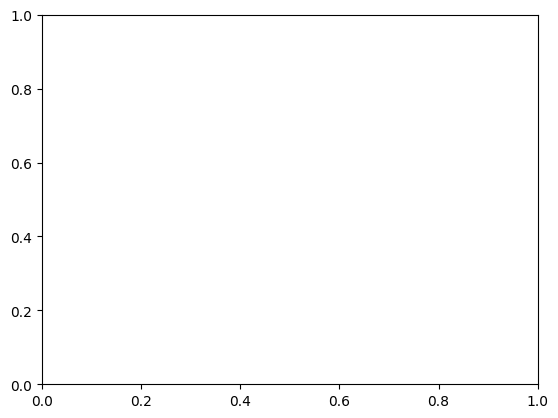

In [15]:
fig,ax=plt.subplots()
counts1 = []
counts2 = []
counts3 = []
counts4 = []
counts5 = []

from scipy.integrate import trapezoid

inds1 = np.where(np.logical_and(hxr_dic['eps_arr']>3.5,hxr_dic['eps_arr']<10.5))
inds2 = np.where(np.logical_and(hxr_dic['eps_arr']>9.5,hxr_dic['eps_arr']<15.5))
inds3 = np.where(np.logical_and(hxr_dic['eps_arr']>14.5,hxr_dic['eps_arr']<25.5))
for i in fluxes:
    hxr_dic = ntbremss(Ecut=15,Emax=50000,delta=8.0,Eflux=i,calc_cttm=1)
    
    #inds4 = np.where(np.logical_and(hxr_dic['eps_arr']>25,hxr_dic['eps_arr']<50))
    #inds5 = np.where(np.logical_and(hxr_dic['eps_arr']>50,hxr_dic['eps_arr']<84))
    #count1 = scipy.integrate(hxr_dic['I_keV_thick'][inds1][0],hxr_dic['eps_arr'][inds1]0])
    #count2 = scipy.integrate(hxr_dic['I_keV_thick'][inds2],hxr_dic['eps_arr'][inds2])
    #count3 = scipy.integrate(hxr_dic['I_keV_thick'][inds3],hxr_dic['eps_arr'][inds3])
    count1 = trapezoid(hxr_dic['I_keV_thick'][inds1],hxr_dic['eps_arr'][inds1[0]])
    count2 = trapezoid(hxr_dic['I_keV_thick'][inds2],hxr_dic['eps_arr'][inds2[0]])
    count3 = trapezoid(hxr_dic['I_keV_thick'][inds3],hxr_dic['eps_arr'][inds3[0]])
    #count4 = np.trapz(hxr_dic['I_keV_thick'][inds4],hxr_dic['eps_arr'][inds4[0]])              
    #count5 = np.trapz(hxr_dic['I_keV_thick'][inds5],hxr_dic['eps_arr'][inds5[0]])       

    counts1.append(count1)
    counts2.append(count2)
    counts3.append(count3)
    #counts4.append(count4)
   # counts5.append(count5)

    #ax.plot(np.log(hxr_dic['eps_arr']),np.log(hxr_dic['I_keV_thick']))

Text(0, 0.5, 'Integrated flux [$log_{10}$($photons$ $s^{-1}$ $cm^{-2}$)]')

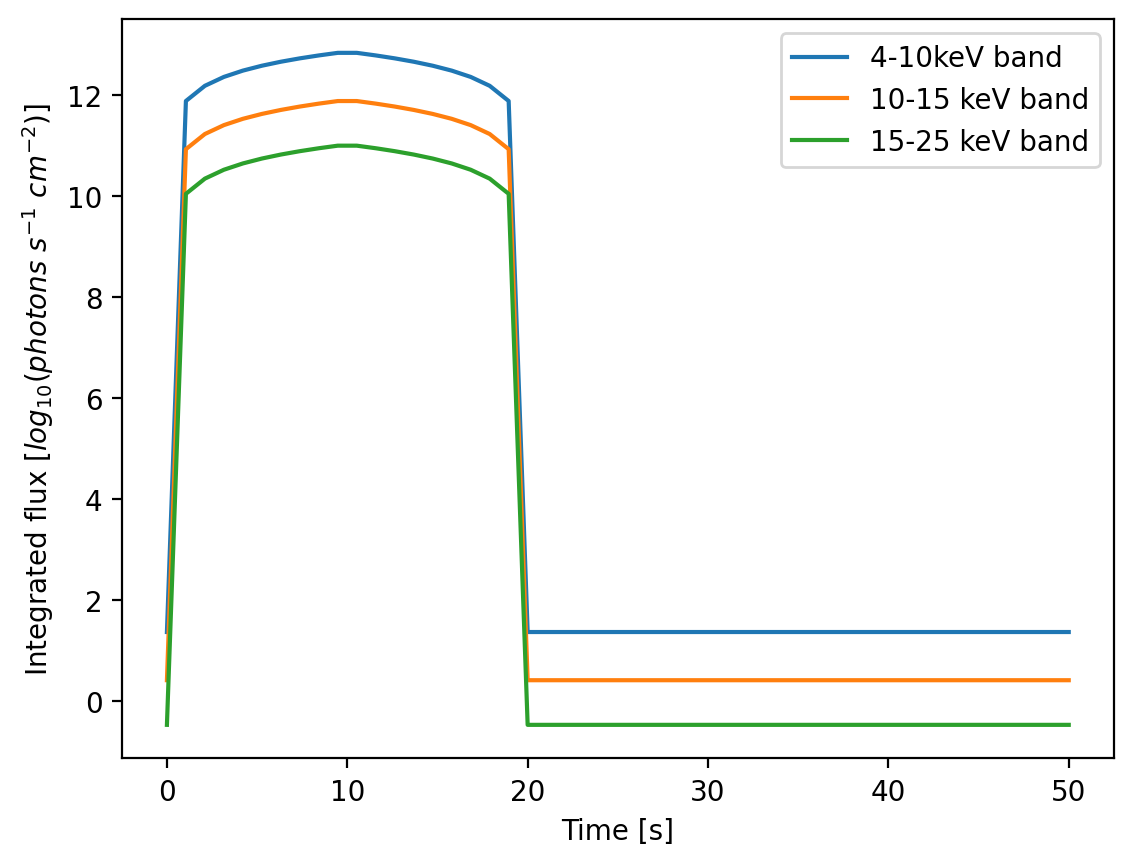

In [17]:
import tol_colors as tc
muted = tc.tol_cset('muted')

fig,ax=plt.subplots(dpi=200)
ax.plot(times,np.log10(counts1),label='4-10keV band')
ax.plot(times,np.log10(counts2),label='10-15 keV band')
ax.plot(times,np.log10(counts3),label='15-25 keV band')
#ax.plot(times,np.log10(counts4),label='25-50 keV band')
#ax.plot(times,np.log10(counts5),label='50-84 keV band')

ax.legend()
ax.set_xlabel('Time [s]')
ax.set_ylabel(r'Integrated flux [$log_{10}$($photons$ $s^{-1}$ $cm^{-2}$)]')
        



In [19]:
peak1_mod

NameError: name 'peak1_mod' is not defined

given the limits of the STIX counts during the times of hte observations, what HXR area must one have to give those counts at the STIX spacecraft

In [21]:
dist_tosun = 127863685*1000 # in m
det_area = 6e-4 # in m2

#peak counts in first, second, third bands
peak1 = 1.4e6/4
peak2 = 1.2e6/4
peak3 = 1116/4
peak4 = 1116/4
peak5 = 1116/4

peak1_mod = np.nanmax(counts1)
peak2_mod = np.nanmax(counts2)
peak3_mod = np.nanmax(counts3)

#assume 1s of emission? divided by 4s 
def emit_area(peakcounts_stix,peakemission_model,dist_tosun=dist_tosun,det_area=det_area):
    return (peakcounts_stix * (4 * np.pi * dist_tosun**2)/2)/peakemission_model/det_area #/2 for solid angle because isotropic in forward atmosphere

emit_area1 = emit_area(peak1,peak1_mod)
emit_area2 = emit_area(peak2,peak2_mod)
emit_area3 = emit_area(peak3,peak3_mod)

print(emit_area1)
print(emit_area2)
print(emit_area3)

print(np.sqrt(emit_area1)/727000)
print(np.sqrt(emit_area2)/727000)
print(np.sqrt(emit_area3)/727000)

8.640015511734532e+18
6.67894347806869e+19
4.758393193840172e+17
4043.1778953758685
11241.375972806114
948.8460455828141


In [23]:
# do the same but subtract the "non-flare" from observatiosn
min1 = 231/4
min2 = 40/4
min3 = 60/4

emit_area1 = emit_area(peak1-min1,peak1_mod)
emit_area2 = emit_area(peak2-min2,peak2_mod)
emit_area3 = emit_area(peak3-min3,peak3_mod)

print(emit_area1)
print(emit_area2)
print(emit_area3)

print(np.sqrt(emit_area1)/727000)
print(np.sqrt(emit_area2)/727000)
print(np.sqrt(emit_area3)/727000)

8.638589909175095e+18
6.67872084661942e+19
4.502565602773496e+17
4042.844319438925
11241.188614978571
922.9870629179709


In [33]:
# do the same but for the time just before the observations

late1 = 1983/4
late2 = 75/4
late3 = 61/4

emit_area1 = emit_area(late1-min1,peak1_mod)
emit_area2 = emit_area(late2-min2,peak2_mod)
emit_area3 = emit_area(late3-min3,peak3_mod)

print('Areas, in arcsec^2')

print(emit_area1/727000**2)
print(emit_area2/727000**2)
print(emit_area3/727000**2)
print('')

print('Lengths, in arcsec^2')
print(np.sqrt(emit_area1)/727000)
print(np.sqrt(emit_area2)/727000)
print(np.sqrt(emit_area3)/727000)
print('')

print('Areas, in km2')

print(emit_area1/(1000**2))
print(emit_area2/(1000**2))
print(emit_area3/(1000**2))
print('')
print('Lengths, in km')
print(np.sqrt(emit_area1)/1000)
print(np.sqrt(emit_area2)/1000)
print(np.sqrt(emit_area3)/1000)

Areas, in arcsec^2
20457.462634918127
3685.7489013911586
806.7283317366877

Lengths, in arcsec^2
143.02958657186326
60.71036897755736
28.402963432302055

Areas, in km2
10812362268.970642
1948025181.1033678
426379318.4444598

Lengths, in km
103982.5094377446
44136.4382466842
20648.954415283595


Argument: we see that a more energetic beam produces reasonable areas corresponding to the peak HXR emission, but might be appropriate to lower by a factor of 10 for late phase emission.  When we explore the emission in the lower-energy STIX bands for later in the evolution, find that an area of ~3600-20e3 square arcsec is reasonable; but this assumes all energy is emitted on a 1D plane, and also doesn't take into account the SXR emission from the loop or the HXR emission above.  Also subject to the binning from STIX.

Also, is the thick-target model appropriate for the emission in these bands?

In [172]:
print(np.sqrt(emit_area1)/1000)
print(np.sqrt(emit_area2)/1000)
print(np.sqrt(emit_area3)/1000)

96085.76230770859
38765.47797416479
20648.954415283595


/var/folders/_1/p_v_pt7912z2pqq5nrvwvhlc0000gn/T/ipykernel_76409/3823917296.py:1: RuntimeWarning: divide by zero encountered in log
  fig,ax=plt.subplots();ax.plot(np.log(hxr_dic['eps_arr']),np.log(hxr_dic['I_keV_thick']))


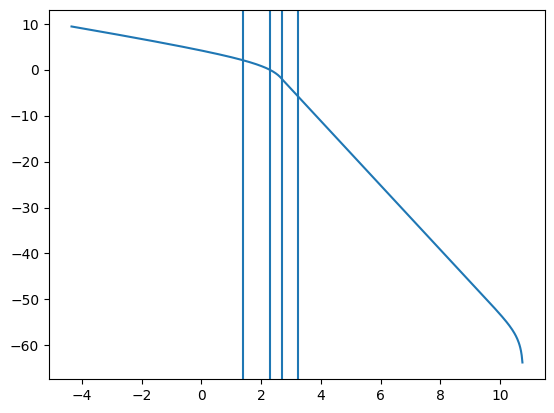

In [344]:
fig,ax=plt.subplots();ax.plot(np.log(hxr_dic['eps_arr']),np.log(hxr_dic['I_keV_thick']))
ax.axvline(np.log(4))
ax.axvline(np.log(10))
ax.axvline(np.log(15))
ax.axvline(np.log(25))

In [23]:
hxr_dic['I_keV_thick']

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.